In [1]:
from query_round_wins import get_buy_vs_low_econ_pct
from style.style import get_style_dict
import matplotlib.pyplot as plt
import numpy as np

c:\Users\ABTTr\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = get_buy_vs_low_econ_pct()
style = get_style_dict()

In [3]:
INCLUDED_TEAMS = ["HEROIC","Eternal Fire", "paiN", "BetBoom",
                  "Natus Vincere", "Spirit", "Vitality", "G2",
                  "Liquid", "Falcons", "FaZe", "FURIA",
                  "Astralis", "FlyQuest", "Virtus.pro", "BIG"
                  ]
SECONDARY_COLOR = []


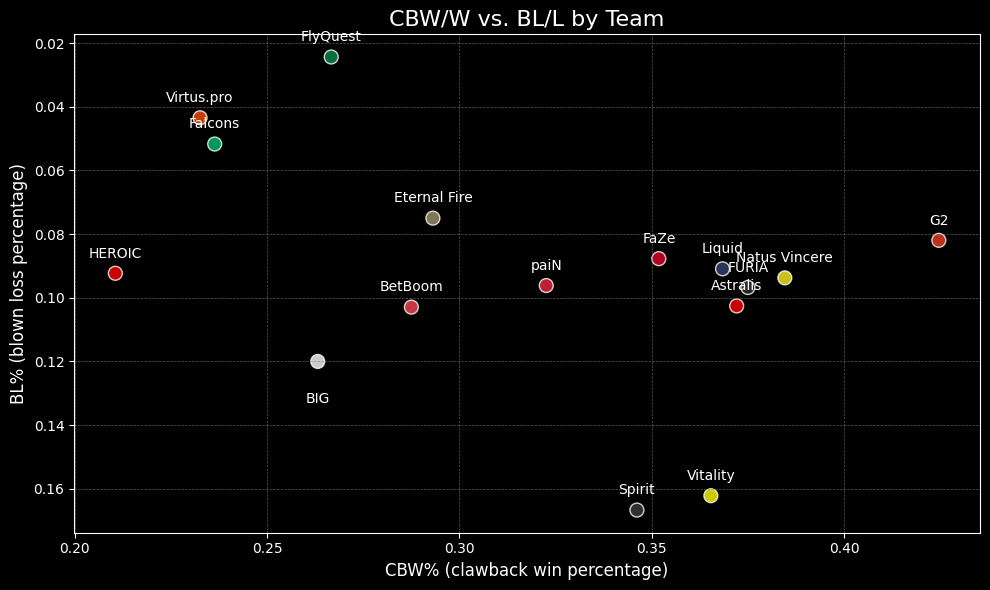

In [4]:
# Extract data for included teams
x_values = []
y_values = []
colors = []
labels = []

for team in INCLUDED_TEAMS:
    if team in data:
        team_data = data[team]
        x_values.append(team_data["BRW"] / team_data["W"])
        y_values.append(team_data["BRL"] / team_data["L"])
        colors.append(
            style[team]["secondary_color"]
            if team in SECONDARY_COLOR
            else style[team]["primary_color"]
        )
        labels.append(team)

# Create the plot
plt.style.use("dark_background")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x_values, y_values, c=colors, s=100, edgecolor="white", alpha=0.8)

# Add labels to each point
for i, label in enumerate(labels):
    if label=="BIG":
        plt.text(
        x_values[i],
        y_values[i]+0.014,
        label,
        fontsize=10,
        ha="center",
        va="bottom",
        color="white",
    )
    else:
        plt.text(
        x_values[i],
        y_values[i]-0.004,
        label,
        fontsize=10,
        ha="center",
        va="bottom",
        color="white",
    )

# Customize the plot
plt.title("CBW/W vs. BL/L by Team", fontsize=16, color="white")
plt.xlabel("CBW% (clawback win percentage)", fontsize=12, color="white")
plt.ylabel("BL% (blown loss percentage)", fontsize=12, color="white")
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()  # Invert the y-axis
plt.xticks(color="white", fontsize=10)
plt.yticks(color="white", fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

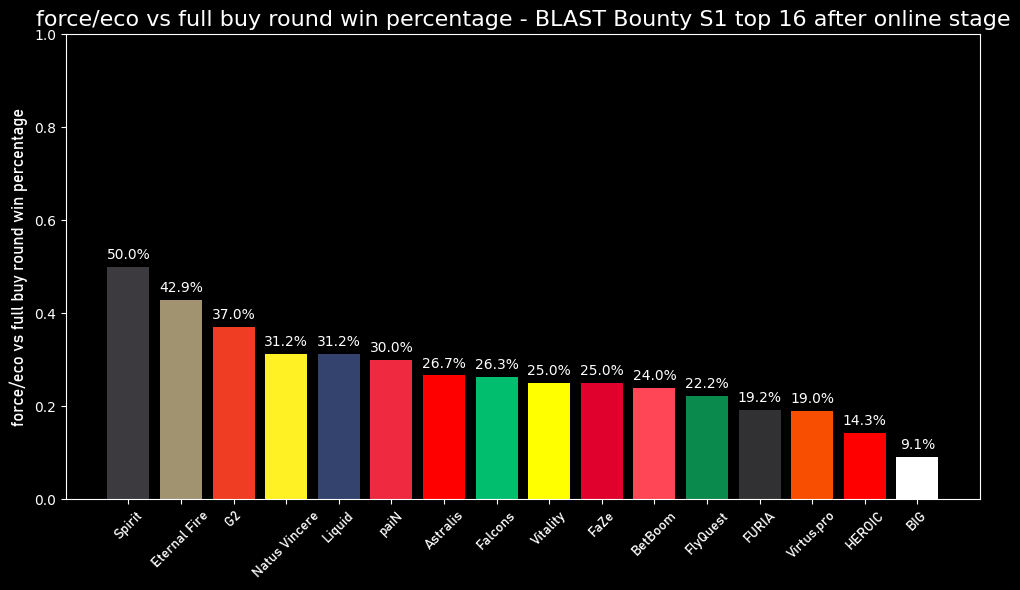

In [8]:
# Calculate win percentages for included teams
win_percentages = {
    team: data[team]["LRW"] / (data[team]["LRL"] + data[team]["LRW"])
    for team in INCLUDED_TEAMS if team in data
}

# Sort teams by win percentage in descending order
sorted_teams = sorted(win_percentages, key=win_percentages.get, reverse=True)
sorted_win_percentages = [win_percentages[team] for team in sorted_teams]

# Determine bar colors
colors = [
    style[team]["secondary_color"] if team in SECONDARY_COLOR else style[team]["primary_color"]
    for team in sorted_teams
]

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_teams, sorted_win_percentages, color=colors)

# Add value labels
for bar, win_percentage in zip(bars, sorted_win_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{100*win_percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=10,
    )

# Customize the plot
plt.title("force/eco vs full buy round win percentage - BLAST Bounty S1 top 16 after online stage", fontsize=16)
plt.ylabel("force/eco vs full buy round win percentage", fontsize=12, font="bahnschrift")
plt.xticks(rotation=45, fontsize=10, font="bahnschrift")
plt.ylim(0, 1)

# Show the plot
plt.tight_layout()
plt.show()